In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Loading model

In [2]:
model = tf.keras.models.load_model('trained_model.keras', compile=False)

2024-11-15 21:58:56.925386: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-11-15 21:58:56.925411: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-15 21:58:56.925418: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-15 21:58:56.926317: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-15 21:58:56.926506: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

## Visualizing Single image

In [4]:
import cv2

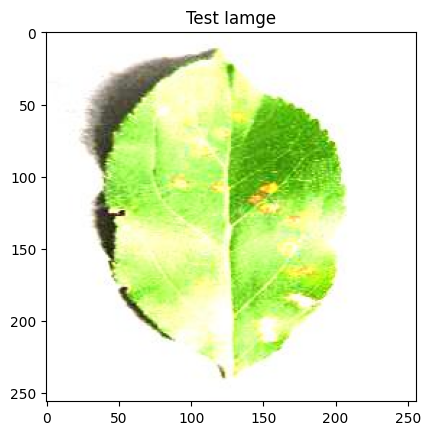

In [6]:
image_path = "test/test/AppleCedarRust1.JPG"
img= cv2.imread(image_path)
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Test Iamge")
plt.show()

## Testing Model

(1, 128, 128, 3)


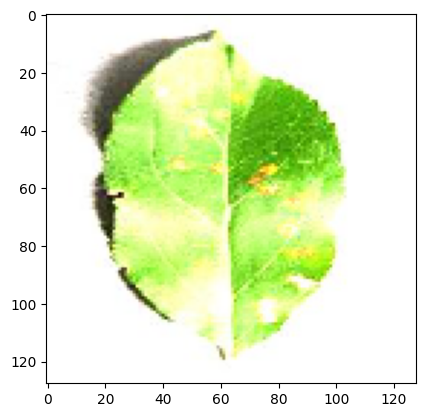

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)



input_arr = np.array([input_arr])
print(input_arr.shape)

plt.imshow(image)

In [8]:
prediction = model.predict(input_arr)

1/1 [==============================] - 0s 249ms/step


2024-11-15 22:00:26.401852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [9]:
prediction,prediction.shape

(array([[9.63254656e-16, 1.31531710e-16, 1.00000000e+00, 8.37108315e-21,
         7.67470533e-14, 2.64382700e-14, 1.80811665e-21, 7.17710083e-19,
         3.51234771e-26, 4.36729654e-22, 3.36868770e-30, 1.70740402e-13,
         2.62385018e-20, 9.88766145e-20, 4.52624507e-20, 9.36563067e-12,
         7.90655518e-14, 1.91332881e-17, 1.43102934e-16, 1.13086894e-14,
         7.19147437e-23, 4.21132074e-19, 1.03952733e-20, 2.08050565e-18,
         1.99703727e-24, 3.69383117e-21, 3.00634451e-19, 3.73811048e-23,
         3.57041147e-10, 2.10255465e-14, 3.18525249e-14, 2.61536849e-18,
         4.74363650e-16, 4.09010440e-20, 6.91139680e-12, 1.41004992e-13,
         1.98132206e-17, 2.13446121e-20]], dtype=float32),
 (1, 38))

In [10]:
result_index = np.argmax(prediction)
result_index

2

In [11]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [12]:
## Display
model_prediction = class_name[result_index]


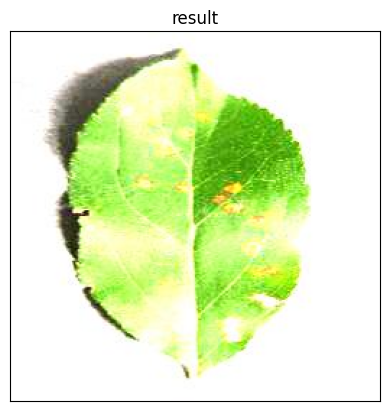

In [13]:
plt.imshow(img)
plt.title("result")
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
model_prediction

'Apple___Cedar_apple_rust'